## Protein Interaction network description

- Reactome network, part of the Koblenz Network Collection

- This directory contains the TSV and related files of the reactome network:

- This is a network of protein–protein interactions in the species <i>Homo sapiens</i>, 
- i.e., in Humans.  The data is curated by the Reactome project, an open online database of biological pathways. 


> Name:  Reactome           
Code:  RC            
Url:  http://www.reactome.org/pages/download-data/            
Category:  Metabolic              
Description:  Protein–protein interactions           
Cite:  konect:reactome        
Long-description:  This is a network of protein–protein interactions in the species <i>Homo sapiens</i>, i.e., in Humans.  The data is curated by the Reactome project, an open online database of biological pathways.       
Entity-names: protein        
Relationship-names:  interaction       
Extr:  reactome       
Timeiso:  2014       
Tags:  #regenerate #loop         


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_path = '/content/drive/My Drive/Network Codes/datasets/reaction.edges'

with open(data_path,'r') as f:
    edges = []
    for line in f:
        u,v = line.strip().split()
        edges.append([int(u)-1,int(v) - 1])

In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from collections import OrderedDict
from IPython.core.pylabtools import figsize
from community import best_partition, modularity
pd.set_option('max_rows',200)

In [59]:
T = nx.from_edgelist(edges)
n_nodes = len(T.nodes())
n_edges = len(T.edges())
ccs = list(nx.connected_components(T))
n_components = len(ccs)
print('Numer of nodes: {}'.format(n_nodes))
print('Numer of edges: {}'.format(n_edges))
print('Number of connected components: {}'.format(n_components))

Numer of nodes: 6327
Numer of edges: 147547
Number of connected components: 164


### Connected componets size distribution

In [60]:
cc_dist = np.array([len(cc) for cc in ccs])
Counter(cc_dist).most_common()

[(1, 98),
 (2, 26),
 (3, 16),
 (4, 9),
 (9, 4),
 (7, 3),
 (5, 3),
 (8, 1),
 (5973, 1),
 (11, 1),
 (16, 1),
 (13, 1)]

### Exploring subgraph 1

In [61]:
cc_lookup = {i:cc for i,cc in enumerate(ccs)}
size_lookup = [[i,len(cc)] for i, cc in cc_lookup.items()]
size_lookup = pd.DataFrame(sorted(size_lookup, key = lambda x:x[1],reverse = True),columns = ['id','size'])
size_lookup.head(10)

,id,size
0,1,5973
1,25,16
2,51,13
3,19,11
4,6,9
5,8,9
6,18,9
7,22,9
8,0,8
9,2,7


### Graph Visualization

In [0]:
G = T.subgraph(cc_lookup[1])

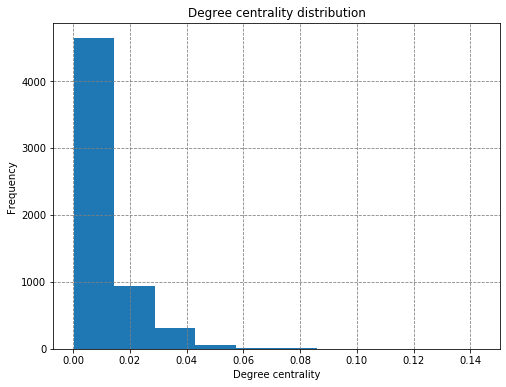

[1007, 226, 214, 510, 1179, 896, 175, 178, 461, 3929]


In [111]:
deg_cent = nx.degree_centrality(G)
sorted_deg_cent = sorted(deg_cent.items(),key = lambda x:x[1],reverse = True)

figsize(8,6)
plt.hist(deg_cent.values())
plt.title('Degree centrality distribution')
plt.grid(True,linestyle = '--',color = 'gray')
plt.xlabel('Degree centrality')
plt.ylabel('Frequency')
plt.show()

large_deg_nodes = [n for n, deg in sorted_deg_cent[0:10]]
print(large_deg_nodes)

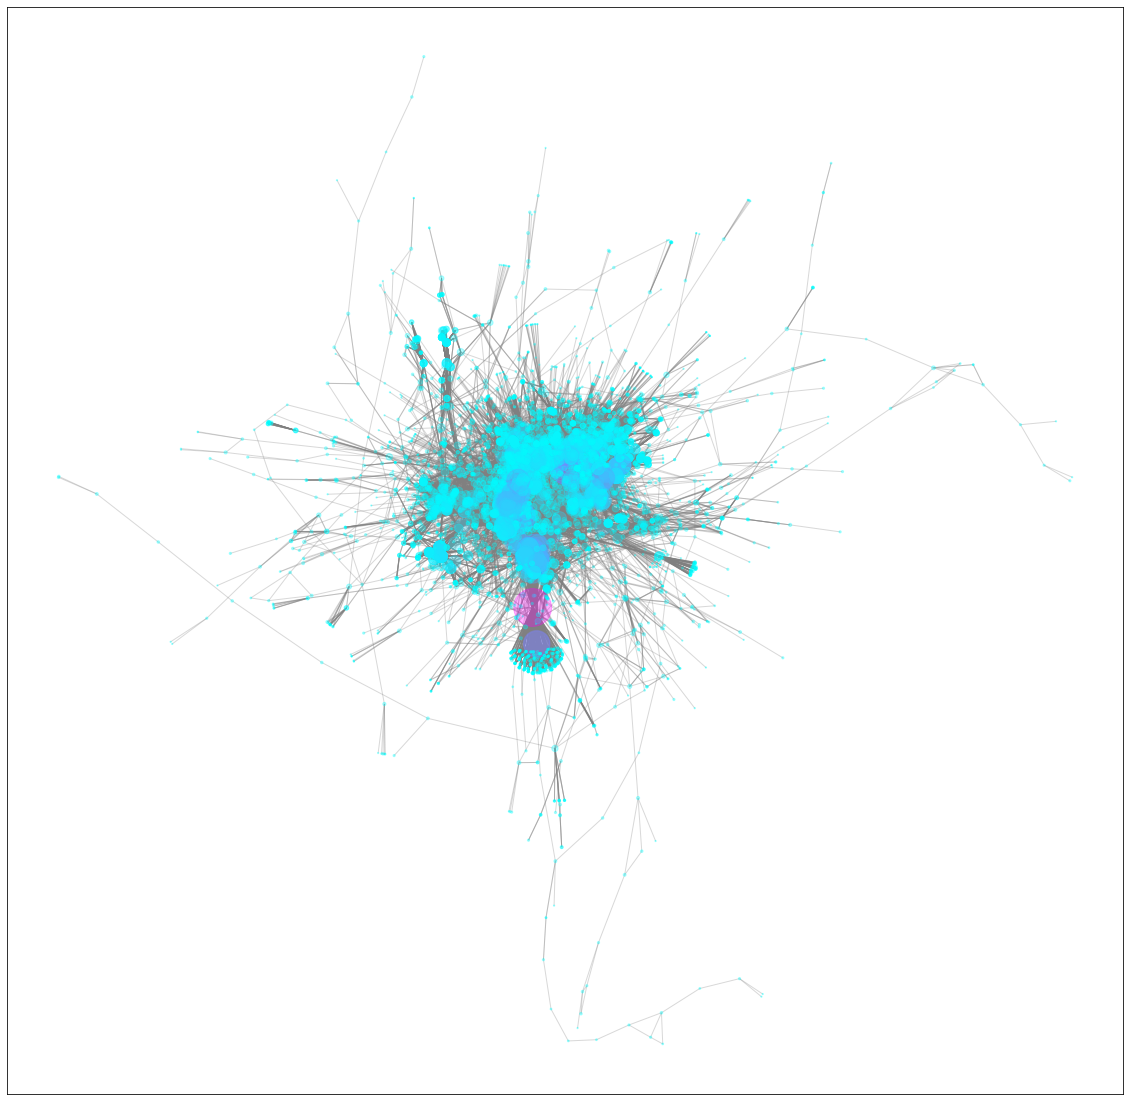

In [113]:
figsize(20,20)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,alpha = 0.3,
                       pos = pos,
                       node_color = np.array(list(deg_cent.values())) * 10000,
                       node_size = np.array(list(deg_cent.values())) * 10000,
                       cmap = plt.get_cmap('cool'))

nx.draw_networkx_edges(G,edge_color = 'gray',alpha = 0.3,pos = pos)
plt.savefig('/content/drive/My Drive/Network Codes/datasets/protein_reaction.png',dpi = 300)
plt.show()

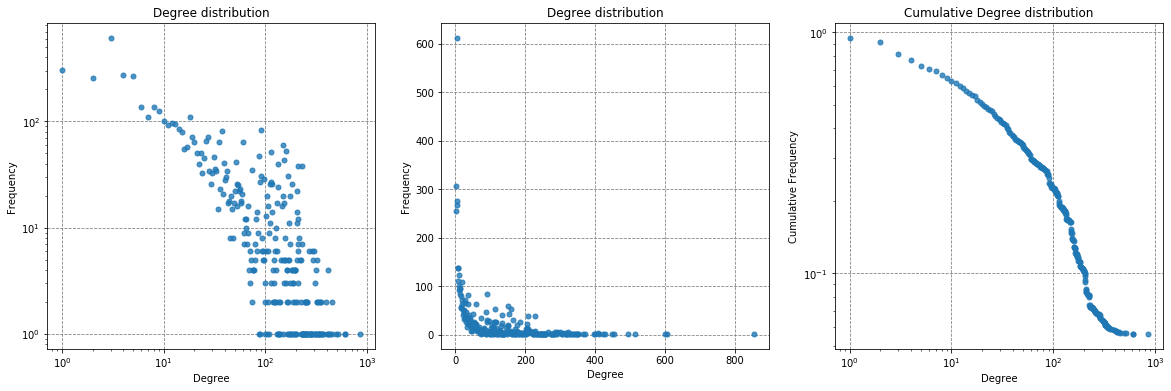

In [164]:
degrees = [d for n, d in  G.degree()]
deg_dist = np.array(sorted(Counter(degrees).items()))
figsize(20,6)

plt.subplot(1,3,1)
plt.loglog(deg_dist[:,0],deg_dist[:,1],linestyle = '',marker = '.', markersize= 10,alpha = .8)
plt.grid(True,linestyle = '--',color = 'gray')
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.plot(deg_dist[:,0],deg_dist[:,1],linestyle = '',marker = '.', markersize= 10,alpha = .8)
plt.grid(True,linestyle = '--',color = 'gray')
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
plt.loglog(deg_dist[:,0],(n_nodes - np.cumsum(deg_dist[:,1]))/n_nodes ,linestyle = '',marker = '.', markersize= 10,alpha = .8)
plt.grid(True,linestyle = '--',color = 'gray')
plt.title('Cumulative Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Cumulative Frequency')
plt.show()

**一个节点可以连接几百个其他节点**

In [0]:
clustering_coefs = nx.clustering(G)

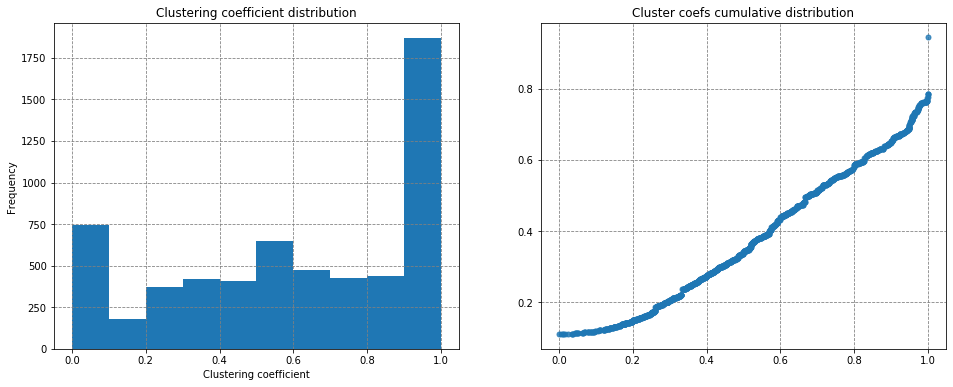

In [203]:
figsize(16,6)
plt.subplot(1,2,1)
plt.hist(clustering_coefs.values())
plt.grid(True,linestyle = '--',color = 'gray')
plt.title('Clustering coefficient distribution')
plt.xlabel('Clustering coefficient')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
coefs_cnt = Counter(sorted([coef for n, coef in clustering_coefs.items()]))
plt.plot(list(coefs_cnt.keys()),np.cumsum(list(coefs_cnt.values())) / n_nodes,linestyle = '',marker = '.', markersize= 10,alpha = .8)
plt.title('Cluster coefs cumulative distribution')
plt.grid(True,linestyle = '--',color = 'gray')
plt.show()

**连接紧密的节点还是很多的**

In [0]:
def louvain(G,return_json = True):
    community = [comm for node, comm in best_partition(G).items()]
    if return_json:
        return json.dumps([{'node':int(i),'community':int(comm)} for i,comm in enumerate(community)],ensure_ascii = False)
    else:
        return community

comm = louvain(G,return_json=False)

In [216]:
pd.DataFrame(np.array(list(Counter(comm).items())),columns = ['comm_id','size']).sort_values(by = 'size',ascending = False)

,comm_id,size
12,12,657
6,6,552
0,0,488
7,7,483
13,13,444
15,15,433
3,3,386
11,11,370
2,2,311
9,9,310


**Assortativity**

In [0]:
assort = np.array([[G.degree(n), np.mean([G.degree(nei) for nei in G.neighbors(n)])] for n in G.nodes()])

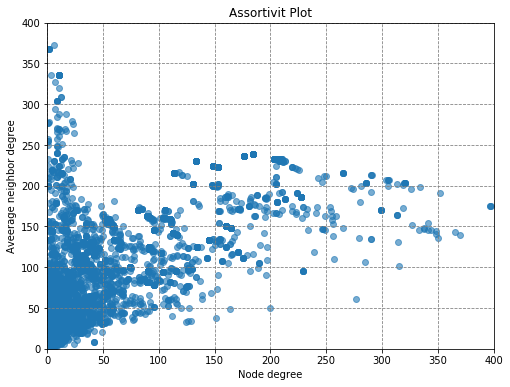

In [225]:
figsize(8,6)
plt.scatter(assort[:,0],assort[:,1],alpha = 0.6)
plt.xlim(0,400)
plt.ylim(0,400)
plt.grid(True,linestyle = '--',color = 'gray')
plt.xlabel('Node degree')
plt.ylabel('Aveerage neighbor degree')
plt.title('Assortivit Plot')
plt.show()

In [227]:
nx.assortativity.degree_assortativity_coefficient(G)

0.2440342693157299

In [0]:
get_community_subgraph = lambda comm_id:G.subgraph([n for i,n in enumerate(G.nodes()) if comm[i] == comm_id])

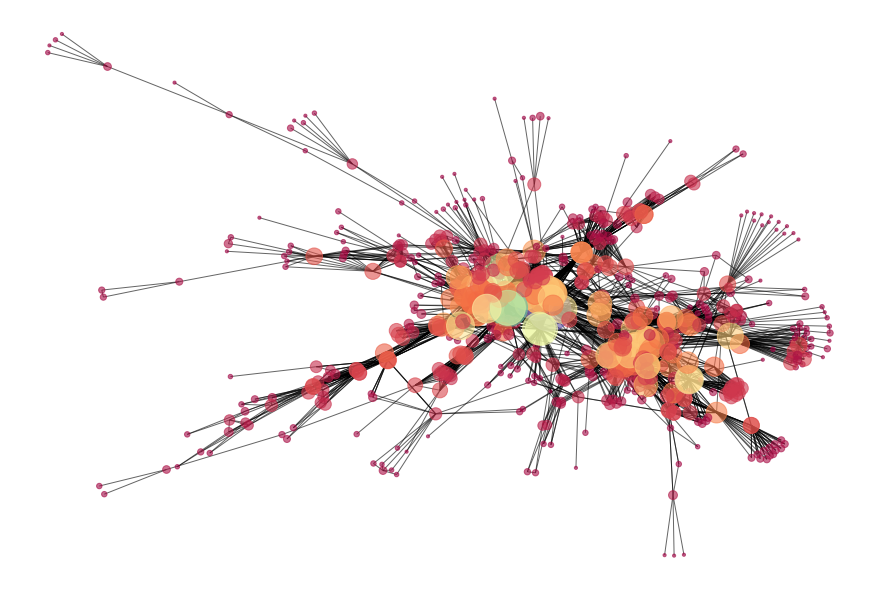

In [252]:
g = get_community_subgraph(12)
figsize(12,8)
nx.draw(g,alpha = .6,node_size = 10*np.array([G.degree(n) for n in g.nodes()]),node_color = 10*np.array([G.degree(n) for n in g.nodes()]),cmap = plt.get_cmap('Spectral'))

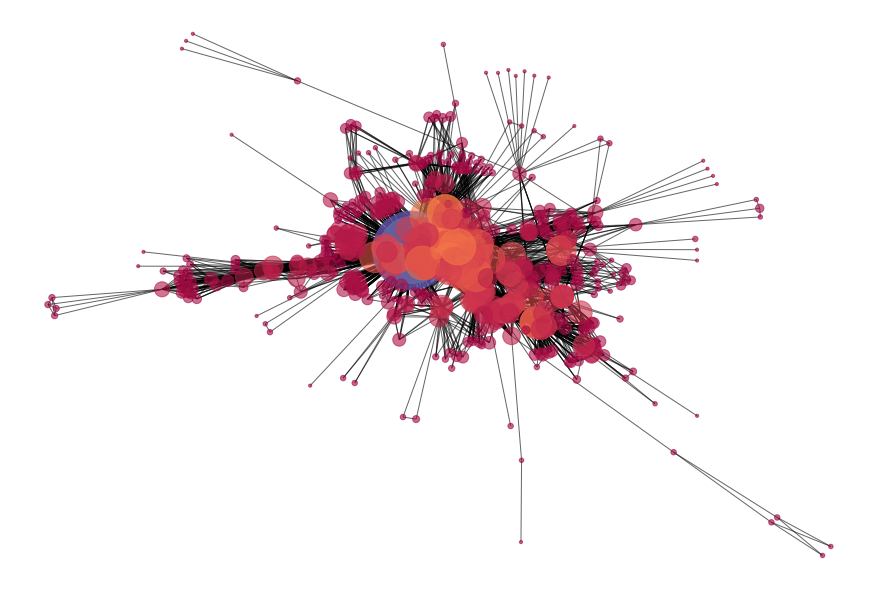

In [253]:
g = get_community_subgraph(6)
figsize(12,8)
nx.draw(g,alpha = .6,node_size = 10*np.array([G.degree(n) for n in g.nodes()]),node_color = 10*np.array([G.degree(n) for n in g.nodes()]),cmap = plt.get_cmap('Spectral'))

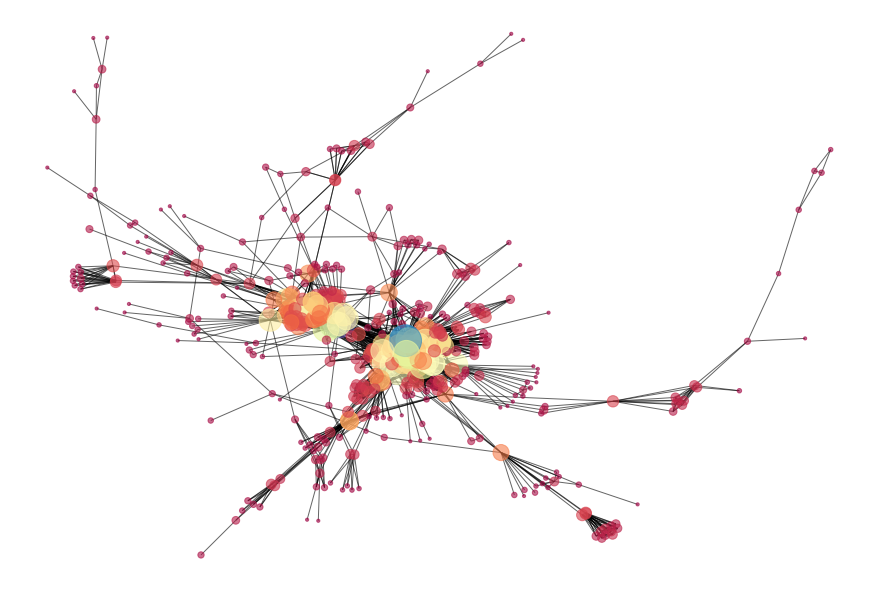

In [254]:
g = get_community_subgraph(0)
figsize(12,8)
nx.draw(g,alpha = .6,node_size = 10*np.array([G.degree(n) for n in g.nodes()]),node_color = 10*np.array([G.degree(n) for n in g.nodes()]),cmap = plt.get_cmap('Spectral'))

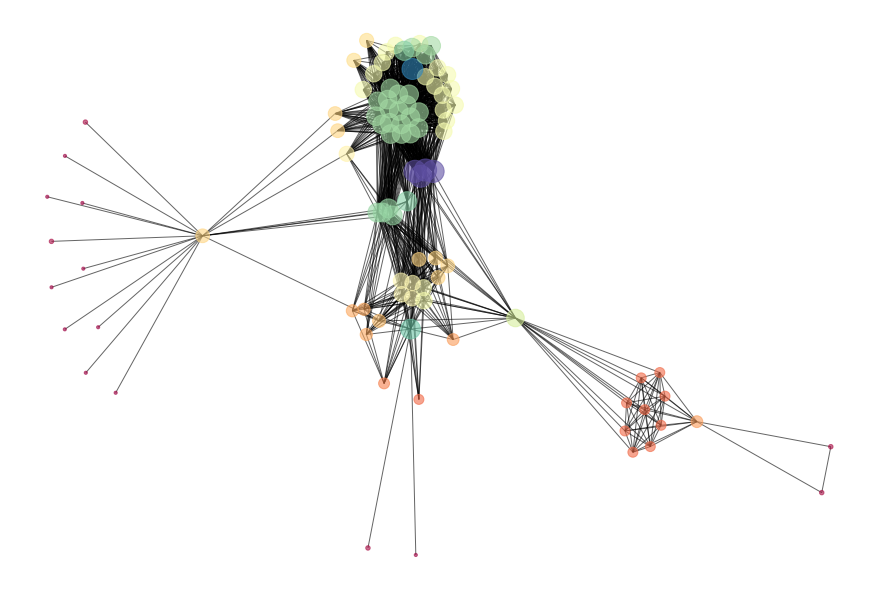

In [255]:
g = get_community_subgraph(19)
figsize(12,8)
nx.draw(g,alpha = .6,node_size = 10*np.array([G.degree(n) for n in g.nodes()]),node_color = 10*np.array([G.degree(n) for n in g.nodes()]),cmap = plt.get_cmap('Spectral'))

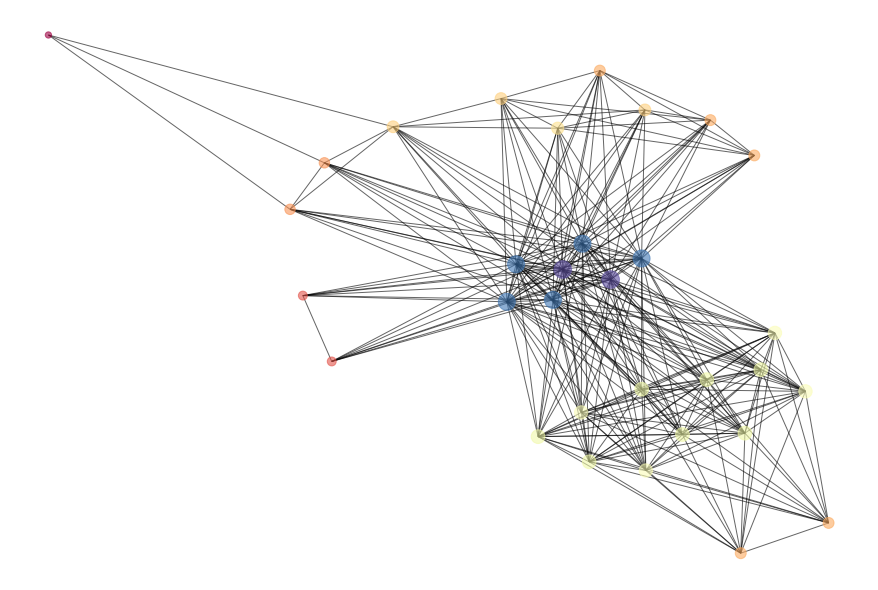

In [257]:
g = get_community_subgraph(21)
figsize(12,8)
nx.draw(g,alpha = .6,node_size = 10*np.array([G.degree(n) for n in g.nodes()]),node_color = 10*np.array([G.degree(n) for n in g.nodes()]),cmap = plt.get_cmap('Spectral'))

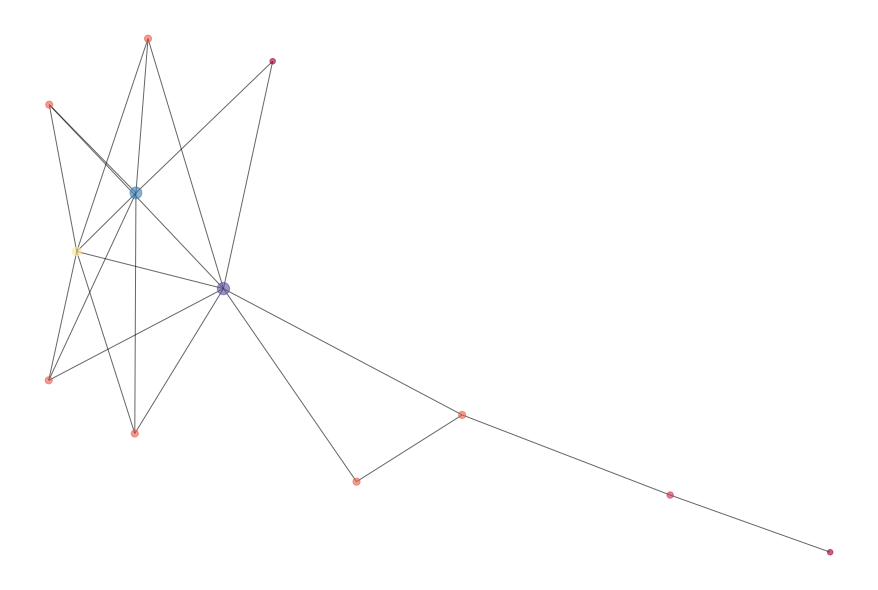

In [258]:
g = get_community_subgraph(20)
figsize(12,8)
nx.draw(g,alpha = .6,node_size = 10*np.array([G.degree(n) for n in g.nodes()]),node_color = 10*np.array([G.degree(n) for n in g.nodes()]),cmap = plt.get_cmap('Spectral'))

*在这个图里，发现团比发现社群更有意义，更能说明问题*      
**Find clique**

In [0]:
comm_cliq = list(nx.community.k_clique_communities(G, k = 8))